In [39]:
from census import Census
from us import states
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import Point, wkt, Polygon

In [7]:
#You can request an API key from https://api.census.gov/data/key_signup.html
c = Census("7887c5d4fc627ab945fed6298d40aa60bb77f488")

In [8]:
commute_census = c.acs5.state_county_tract(
    #See https://api.census.gov/data/2021/acs/acs5/groups/B08303.html for available fields
    fields = ('B08303_001E'),
    state_fips = states.CA.fips,
    #Fips code for SD county
    county_fips = "073",
    #All census tracts
    tract = "*",
    #2021 is the latest year that data appears to be available
    year = 2021
)

In [10]:
commute_df = pd.DataFrame(commute_census)
commute_df

,B08303_001E,state,county,tract
0,982.0,06,073,000100
1,935.0,06,073,000201
2,2184.0,06,073,000202
3,1376.0,06,073,000301
4,1860.0,06,073,000302
...,...,...,...,...
732,2030.0,06,073,021900
733,2040.0,06,073,022000
734,708.0,06,073,022101
735,1950.0,06,073,022102


In [81]:
shape_data= gpd.read_file("tl_2021_06_tract/tl_2021_06_tract.shp")  # All California tract data
shape_data.head(10)

## Subset only San Diego tracts
san_diego_shape_data = shape_data[shape_data["COUNTYFP"].isin(["073"])]

san_diego_shape_data

#Transit Routes
transit_routes_df = gpd.read_file("transit_routes_datasd/transit_routes_datasd.shp")
projected_transit_routes_df = transit_routes_df.to_crs("EPSG:4269")

EPSG:4269


<Axes: title={'center': 'San Diego County Census Tracts'}>

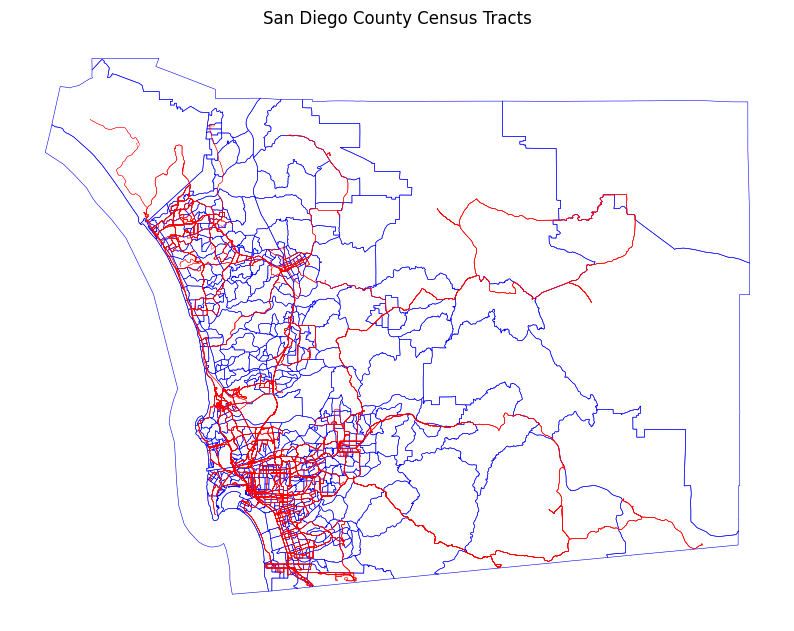

In [84]:
#Checking Projections
print(san_diego_shape_data.crs)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.set_title("San Diego County Census Tracts")
ax.axis("off")
san_diego_shape_data.plot(ax=ax, facecolor = "None",edgecolor = "blue", lw=0.4)
projected_transit_routes_df.plot(ax=ax, edgecolor = "red", lw = 0.3)



SyntaxError: invalid syntax (1991278067.py, line 10)